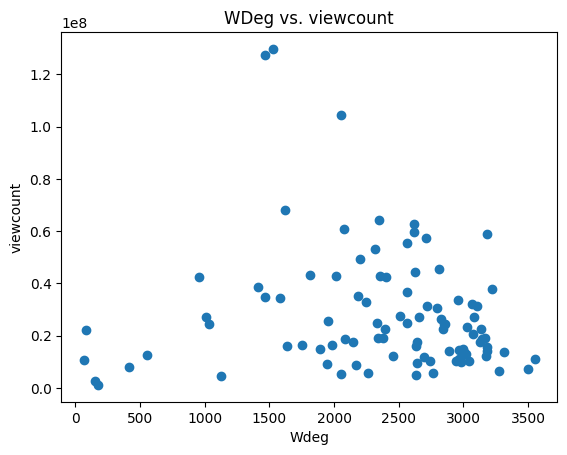

In [61]:
# ====================================================
# TAYLOR SWIFT MODGROUP 2 VIS CORRELATION VIEWCOUNT + WDEG
# ====================================================

import pandas as pd
import matplotlib.pyplot as plt
import os
import networkx as nx
base_dir = os.getcwd()
file_path = os.path.join(base_dir, "TSmod2viewsWdeg.csv")
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
#Spalten in numerisch konvertieren
df["viewcount"] = pd.to_numeric(df["viewcount"], errors='coerce')
df["Weighted Degree"] = pd.to_numeric(df["Weighted Degree"], errors='coerce')

# plot
plt.figure()
plt.scatter(
    df["Weighted Degree"],
    df["viewcount"]
)

plt.xlabel("Wdeg")
plt.ylabel("viewcount")
plt.title("WDeg vs. viewcount")
plt.show()


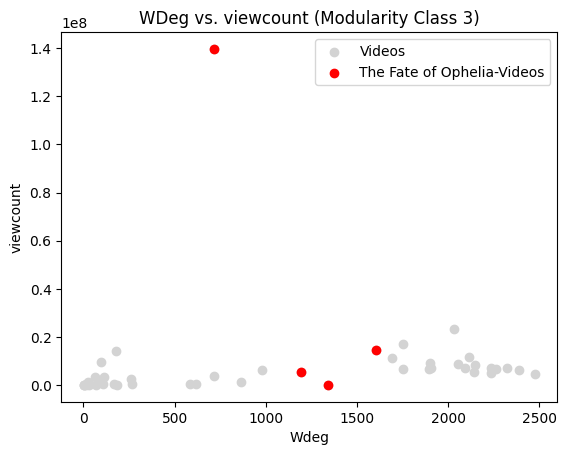

In [62]:
# =====================================================================
# TAYLOR SWIFT MODGROUP 3 VIS FATE OF OPHELIA CO-COMMENTING FREQUENCIES
# =====================================================================

base_dir = os.getcwd()
file_path = os.path.join(base_dir, "TSmodgroup3.csv")
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
#Spalten in numerisch konvertieren
df["viewcount"] = pd.to_numeric(df["viewcount"], errors='coerce')
df["Weighted Degree"] = pd.to_numeric(df["Weighted Degree"], errors='coerce')


special_nodes = ["Taylor Swift - The Fate of Ophelia (Visualizer)",
                "Taylor Swift - The Fate of Ophelia (The Chainsmokers Remix) (Visualizer)",
                "Taylor Swift - The Fate of Ophelia (Lyric Video)",
                "Taylor Swift - The Fate of Ophelia (Official Music Video)"]

mask = df["Label"].isin(special_nodes)

plt.figure()

# Alle Nodes (grau)
plt.scatter(
    df["Weighted Degree"],
    df["viewcount"],
    color="lightgrey"
)

# Hervorgehobene Nodes
plt.scatter(
    df.loc[mask, "Weighted Degree"],
    df.loc[mask, "viewcount"],
    color="red",
    label="Selected nodes"
)

plt.xlabel("Wdeg")
plt.ylabel("viewcount")
plt.title("WDeg vs. viewcount (Modularity Class 3)")
plt.legend(["Videos", "The Fate of Ophelia-Videos"], loc="upper right")
plt.show()


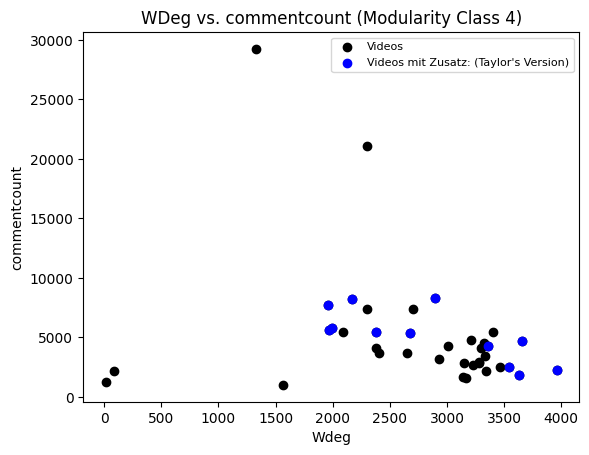

In [60]:
# =====================================================
# TAYLOR SWIFT MODGROUP 4 VIS CORRELATION COMMENTS-WDEG
# =====================================================
base_dir = os.getcwd()
file_path = os.path.join(base_dir, "TSmodgroup4.csv")
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
#Spalten in numerisch konvertieren
df["commentcount"] = pd.to_numeric(df["commentcount"], errors='coerce')
df["Weighted Degree"] = pd.to_numeric(df["Weighted Degree"], errors='coerce')

kw = "(Taylor s Version)"

mask = df["Label"].str.contains(
    kw,
    regex=False
)
# Alle Nodes (grau)
plt.scatter(
    df["Weighted Degree"],
    df["commentcount"],
    color="black"
)

# Hervorgehobene Nodes
plt.scatter(
    df.loc[mask, "Weighted Degree"],
    df.loc[mask, "commentcount"],
    color="blue",
    label="Selected nodes"
)

plt.xlabel("Wdeg")
plt.ylabel("commentcount")
plt.legend(["Videos", "Videos mit Zusatz: (Taylor's Version)"],loc="best", prop={'size': 8})
plt.title("WDeg vs. commentcount (Modularity Class 4)")
plt.show()